# NYC_cabs

In [117]:
#Importation des Modules nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.float_format', lambda x: '%.3f' % x) #round float
plt.rcParams['figure.figsize'] = (8.5, 5)
plt.rcParams["patch.force_edgecolor"] = True
sns.mpl.rc("figure", figsize=(8.5,5))


#Pour que python reconnaisse un dossier comme un module il faut ajouter en son sein un fichier __init__.py 
#et également l'ajouter au PATH

import sys
sys.path.insert(0, "/home/apprenant/PycharmProjects/NYC_cabs")


#On peut ensuite importer le dossier comme un module

from src.utils import *


In [118]:
df = pd.read_csv("/home/apprenant/PycharmProjects/NYC_cabs/data/clean.csv", parse_dates= [2,3] )

In [119]:
df.shape

(9724, 14)

In [120]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,distance_km,trip_duration_h,speed_km_h,weekday,time_hour
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,-73.982,40.768,-73.965,40.766,455,1.499,0.126,11.856,Monday,17
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,-73.980,40.739,-73.999,40.731,663,1.806,0.184,9.804,Sunday,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,-73.979,40.764,-74.005,40.710,2124,6.385,0.590,10.822,Tuesday,11
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,-74.010,40.720,-74.012,40.707,429,1.485,0.119,12.466,Wednesday,19
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,-73.973,40.793,-73.973,40.783,435,1.189,0.121,9.837,Saturday,13


## 1. Exploration des données

In [121]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
vendor_id,9724.000,1.530,0.499,1.000,1.000,2.000,2.000,2.000
pickup_longitude,9724.000,-73.974,0.037,-74.018,-73.992,-73.982,-73.967,-73.756
pickup_latitude,9724.000,40.751,0.027,40.613,40.738,40.755,40.768,40.874
dropoff_longitude,9724.000,-73.974,0.035,-74.380,-73.991,-73.980,-73.963,-73.594
dropoff_latitude,9724.000,40.752,0.032,40.567,40.735,40.755,40.770,41.044
trip_duration,9724.000,823.552,580.235,120.000,409.000,666.500,1065.000,3597.000
distance_km,9724.000,3.399,3.817,0.000,1.284,2.117,3.808,45.116
trip_duration_h,9724.000,0.229,0.161,0.033,0.114,0.185,0.296,0.999
speed_km_h,9724.000,14.353,7.682,0.000,9.163,12.700,17.642,64.096
time_hour,9724.000,13.679,6.401,0.000,9.000,14.000,19.000,23.000


In [122]:
#on ne garde que les courses entre 2 min et 1h

df = df[df['trip_duration'] <= 3600]
df = df[df['trip_duration'] >= 120]



## 1.1 calculer la vitesse moyenne de chaque trajet (en km/h) 

In [123]:
# on cré une nouvelle colonne avec la distance en km calculée apartir des latitudes et longitudes des point de départ et d'arrivée

df['distance_km'] = lat_and_long_to_distance(df['pickup_latitude'].values,df['pickup_longitude'].values, df['dropoff_latitude'].values,df['dropoff_longitude'].values)


In [124]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,distance_km,trip_duration_h,speed_km_h,weekday,time_hour
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,-73.982,40.768,-73.965,40.766,455,1.499,0.126,11.856,Monday,17
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,-73.980,40.739,-73.999,40.731,663,1.806,0.184,9.804,Sunday,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,-73.979,40.764,-74.005,40.710,2124,6.385,0.590,10.822,Tuesday,11
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,-74.010,40.720,-74.012,40.707,429,1.485,0.119,12.466,Wednesday,19
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,-73.973,40.793,-73.973,40.783,435,1.189,0.121,9.837,Saturday,13


In [125]:
df["trip_duration_h"] = df["trip_duration"]/3600 # la colonne trip_duration est transformé en h 

In [126]:
df["speed_km_h"] = df["distance_km"] / df["trip_duration_h"] # nouvelle colonne speed qui a pour unité le km/h

In [127]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,distance_km,trip_duration_h,speed_km_h,weekday,time_hour
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,-73.982,40.768,-73.965,40.766,455,1.499,0.126,11.856,Monday,17
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,-73.980,40.739,-73.999,40.731,663,1.806,0.184,9.804,Sunday,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,-73.979,40.764,-74.005,40.710,2124,6.385,0.590,10.822,Tuesday,11
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,-74.010,40.720,-74.012,40.707,429,1.485,0.119,12.466,Wednesday,19
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,-73.973,40.793,-73.973,40.783,435,1.189,0.121,9.837,Saturday,13


## 1.2 calculer le nombre de trajets effectués en fonction du jour de la semaine 

In [128]:
df['weekday'] = df['pickup_datetime'].dt.day_name()
print(df.groupby(df['weekday']).count()['id'])

weekday
Friday       1477
Monday       1251
Saturday     1473
Sunday       1314
Thursday     1430
Tuesday      1387
Wednesday    1392
Name: id, dtype: int64


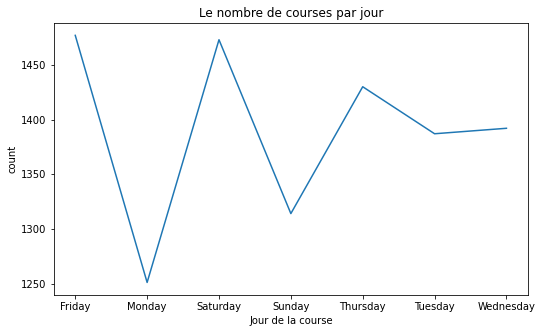

In [129]:


pickups_by_day = df.groupby(df['weekday']).count()['id']

# Create graph
pickups_by_day.plot(x = 'weekday', figsize = (8.5,5))
plt.xlabel('Jour de la course')
plt.ylabel('count')
plt.title("Le nombre de courses par jour")
plt.show()

## 1.3 calculer le nombre de trajets effectués en fonction de l’horaire de la journée par tranche de 4h.

In [130]:
def hr_func(ts):
    return ts.hour

In [131]:
df['time_hour'] = df['pickup_datetime'].apply(hr_func)

In [132]:
list_0_to_3 = []
list_4_to_7 = []
list_8_to_11 = []
list_12_to_15 = []
list_16_to_19 = []
list_20_to_23 = []
for value in df['time_hour'] : 
    if value in [0 ,1, 2 ,3 ] : 
        list_0_to_3.append(value)
    elif value in [4,5,6,7] : 
        list_4_to_7.append(value)
    elif value in [8,9,10,11] :
        list_8_to_11.append(value)
    elif value in [12,13,14,15] :
        list_12_to_15.append(value)
    elif value in [16,17,18,19] : 
        list_16_to_19.append(value)
    else : 
        list_20_to_23.append(value)



In [133]:
print(len(list_0_to_3)) # affiche le nombre de trajet entre minuit et 4h 
print(len(list_4_to_7)) # affiche le nombre de trajet entre 4h et 8h
print(len(list_8_to_11)) # affiche le nombre de trajet entre 8h et 12h
print(len(list_12_to_15)) # affiche le nombre de trajet entre 12h et 16h
print(len(list_16_to_19)) # affiche le nombre de trajet entre 16h et 20h
print(len(list_20_to_23)) # affiche le nombre de trajet entre 20h et minuit

931
777
1775
1904
2187
2150


## 1.4 calculer le nombre de km parcourus par jour de la semaine

In [134]:
df_km_day = df.groupby(df['weekday']).distance_km.sum()
round(df_km_day,2)

weekday
Friday      4825.660
Monday      4460.290
Saturday    4881.420
Sunday      4716.510
Thursday    4804.710
Tuesday     4589.580
Wednesday   4769.320
Name: distance_km, dtype: float64

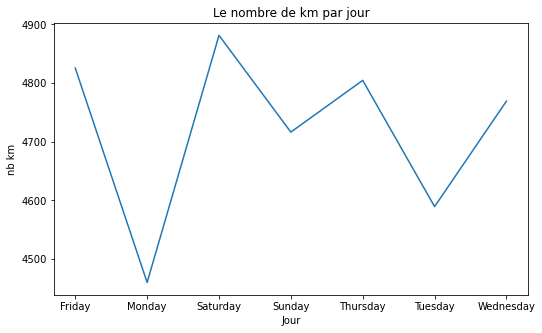

In [135]:
#Create graph
df_km_day.plot(x = 'weekday', figsize = (8.5,5))
plt.xlabel('Jour')
plt.ylabel('nb km')
plt.title("Le nombre de km par jour")
plt.show()

la corrélation entre nombre de courses et nombre de kilomètres est flagrante

## 1.5 Exploration des données 

<AxesSubplot:>

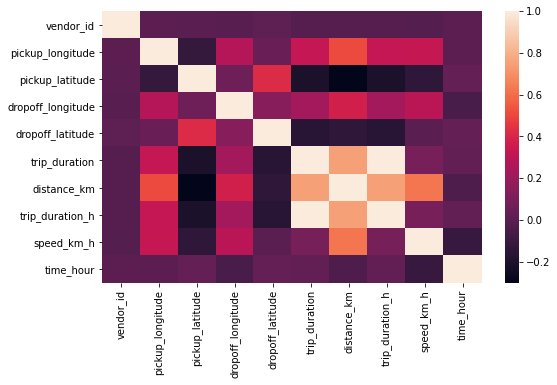

In [136]:
sns.heatmap(df.corr())

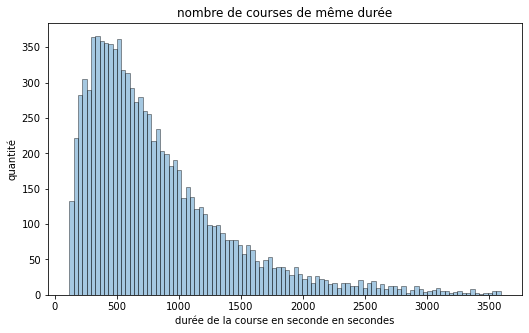

In [137]:
num_bins = 100
fig = plt.figure(figsize=(8.5, 5))
plt.hist(df['trip_duration'], num_bins, edgecolor = 'black', alpha = .40)


plt.xlabel('durée de la course en seconde')
plt.ylabel('quantité')
plt.title("nombre de courses de même durée")
plt.show()

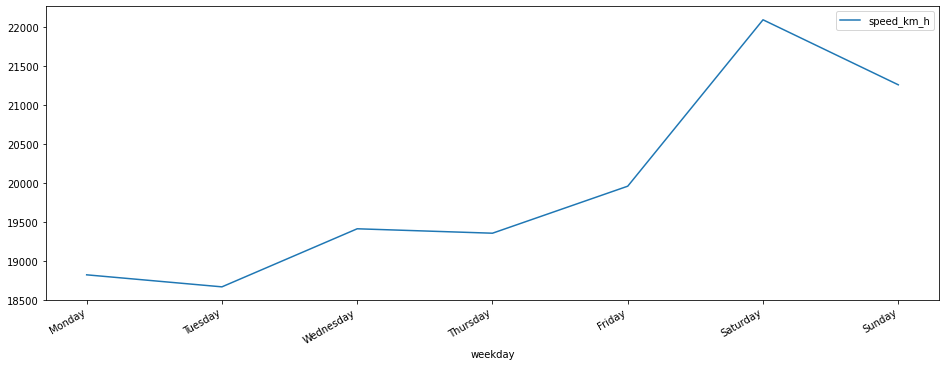

In [138]:

cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

df_weekday = df.groupby(['weekday']).sum().reindex(cats) 
df_weekday[['speed_km_h']].plot(figsize=(16,6), subplots=True);


Ce graphique nous montre la vitesse moyenne en fonction du jour de la semaine. On peut voir qu'il n'y a pas vraiment de difference selon les jour de la semaine, meme si la circulaton le dimanche est legrement plus rapide

<AxesSubplot:xlabel='time_hour', ylabel='count'>

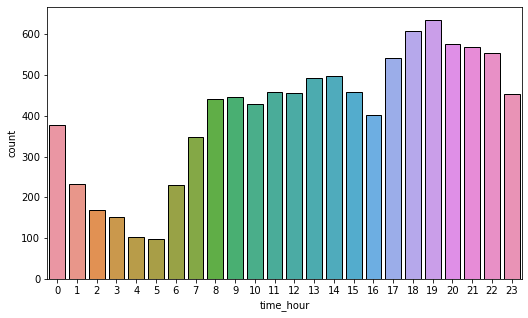

In [139]:
sns.countplot(x = df['time_hour'])

Ce graphique compte le nombre de trajet par heure 

In [140]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,distance_km,trip_duration_h,speed_km_h,weekday,time_hour
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,-73.982,40.768,-73.965,40.766,455,1.499,0.126,11.856,Monday,17
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,-73.980,40.739,-73.999,40.731,663,1.806,0.184,9.804,Sunday,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,-73.979,40.764,-74.005,40.710,2124,6.385,0.590,10.822,Tuesday,11
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,-74.010,40.720,-74.012,40.707,429,1.485,0.119,12.466,Wednesday,19
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,-73.973,40.793,-73.973,40.783,435,1.189,0.121,9.837,Saturday,13


In [141]:
df.shape

(9724, 14)

In [142]:
df.to_csv("/home/apprenant/PycharmProjects/NYC_cabs/data/clean.csv", index = False , sep = ',' , encoding = 'utf-8', line_terminator = '\n' )